This project is actually for learning purpose. Shows diffrent steps of complete machine learning project. The teaching source is CampusX. Special thanks to Nitish Sir. Here is the link of channel: [CampusX](https//www.youtube.com/@campusx-official)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

**We will perform the following steps**


1.   Preprocess + EDA + Feature Selection
2.   Extract input and output cols
2.   Train Test Split

1.   Scale the values

5. Train the Model
6. Evaluate the model/ model selection
7. Deploy the model













**1. Preprocess + EDA + Feature Selection**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt


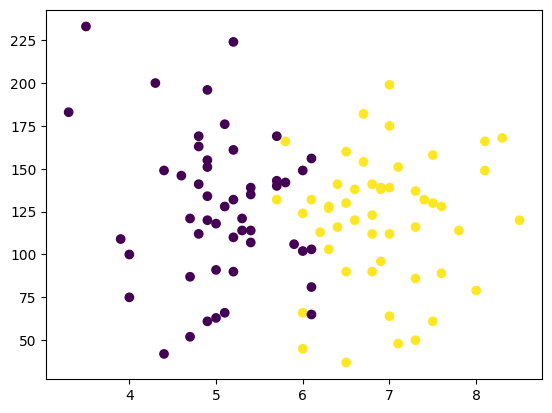

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

**2. Extract input and output cols**

In [10]:
X=df.iloc[:,0:2]

In [11]:
y=df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [14]:
y.shape

(100,)

**3. Train Test Split**

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [16]:
X_train.shape

(90, 2)

In [17]:
y_test.shape

(10,)

In [18]:
X_test

,cgpa,iq
49,5.4,135.0
61,7.3,137.0
42,7.6,89.0
98,6.3,103.0
72,7.3,116.0
75,4.8,169.0
21,7.1,151.0
20,6.6,120.0
8,6.1,156.0
41,5.4,114.0


**4.Scale the values**

In [19]:
from sklearn.preprocessing import StandardScaler


In [20]:
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train)

In [22]:
X_train

array([[ 7.40664346e-01,  4.38584809e-01],
       [-2.29721676e+00,  1.46068751e+00],
       [-4.74488097e-01, -3.88831661e-01],
       [-4.74488097e-01,  3.89913251e-01],
       [ 3.06681331e-01,  1.22219688e-01],
       [-7.34877906e-01, -1.38659858e+00],
       [ 5.67071140e-01,  3.65577473e-01],
       [-1.16886092e+00,  5.60263701e-01],
       [-9.95267715e-01, -2.67152769e-01],
       [ 2.21620660e+00, -7.24665405e-02],
       [ 9.14257552e-01,  3.89913251e-01],
       [ 8.27460949e-01,  3.89913251e-01],
       [-2.12362356e+00,  2.67747643e+00],
       [ 1.17464736e+00, -8.99883010e-01],
       [-9.08471112e-01, -1.50827747e+00],
       [-9.08471112e-01, -7.24665405e-02],
       [-1.08206432e+00, -1.72729948e+00],
       [ 1.86902019e+00,  6.33271037e-01],
       [-9.08471112e-01,  6.81942594e-01],
       [ 1.34824057e+00,  8.52293043e-01],
       [ 1.33088125e-01, -1.02156190e+00],
       [-8.21674509e-01, -1.45960592e+00],
       [-6.48081303e-01, -8.02539896e-01],
       [-9.

In [23]:
X_test=scaler.transform(X_test)

In [24]:
X_test

array([[-0.4744881 ,  0.29257014],
       [ 1.17464736,  0.34124169],
       [ 1.43503717, -0.82687567],
       [ 0.30668133, -0.48617478],
       [ 1.17464736, -0.16980965],
       [-0.99526772,  1.11998661],
       [ 1.00105416,  0.68194259],
       [ 0.56707114, -0.07246654],
       [ 0.13308812,  0.80362149],
       [-0.4744881 , -0.21848121]])

**5.Train the Model**

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf=LogisticRegression()

In [38]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

**6. Evaluate the model/ model selection**

In [39]:
y_pred=clf.predict(X_test)

In [40]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [41]:
y_test

49    0
61    1
42    1
98    1
72    1
75    0
21    1
20    1
8     0
41    0
Name: placement, dtype: int64

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,y_pred)

0.9

In [44]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

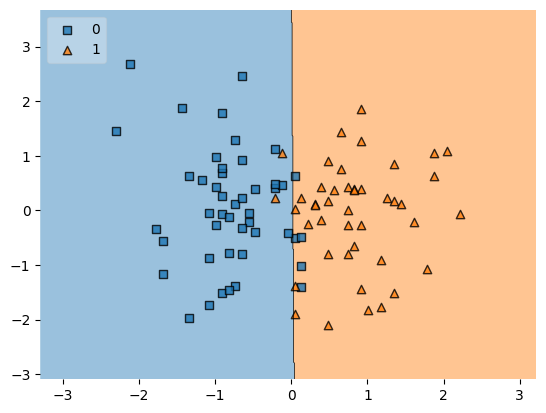

In [45]:
# Plotting decision regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

**7. Deploy the model**

In [46]:
import pickle

In [47]:
pickle.dump(clf,open('model.pkl','wb'))